In [12]:
import pandas as pd
import seaborn as sb
from sklearn import metrics
from sklearn.cluster import KMeans

In [3]:
dt = pd.read_csv("U4_01_housing.csv")
dt.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='longitude', ylabel='latitude'>

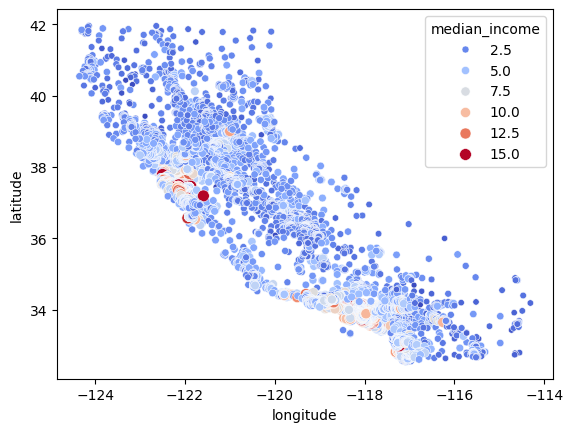

In [8]:
sb.scatterplot(x = "longitude", y = "latitude", data = dt, hue ="median_income", palette = "coolwarm", size = "median_income")

Para esto separamos los datos que vamos a utilizar para entrenar a este modelo

In [11]:
dt_sep = dt.loc[:,["latitude", "longitude", "median_income"]]

Aqui creamos el modelo el cual podemos especificar el numero de cluster, en este caso el cluster con las cantidad de grupos que se van a crear en base a la diferencia de los datos y como se encuentran en grupos diferentes

In [40]:
model = KMeans(n_clusters= 6)
predict =model.fit_predict(dt_sep)

In [41]:
dt_sep["Estrato_social"] = predict
dt_sep["Estrato_social"].value_counts()

Estrato_social
4    4773
1    4603
2    4570
5    3434
0    2627
3     633
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

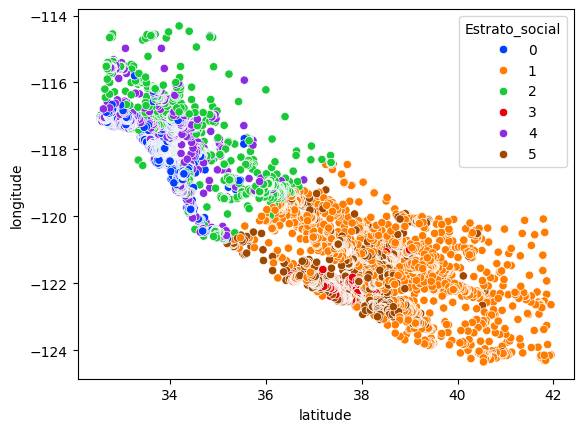

In [43]:
sb.scatterplot(x="latitude", y = "longitude", data = dt_sep, hue = "Estrato_social", palette = "bright" )

EN etsa liena separamos el grupo en base  la caracteristica de estrato social y cada uno le estamos sacando e promedio de valores para ver como es la tendencia de cad grupo

In [49]:
dt_sep.groupby(["Estrato_social"])["median_income"].mean().sort_values()

Estrato_social
2    2.277492
1    2.533855
4    3.953298
5    4.676308
0    6.693333
3    8.385867
Name: median_income, dtype: float64

Para este caso tratamos de averiguiar el grupo de la personas que en general viven en cada casa

In [51]:
dt["person_by_house"] = dt["population"] / dt["households"]
dt_person_by_house = dt.loc[:,["latitude", "longitude", "person_by_house"]]
dt_person_by_house

,latitude,longitude,person_by_house
0,37.88,-122.23,2.555556
1,37.86,-122.22,2.109842
2,37.85,-122.24,2.802260
3,37.85,-122.25,2.547945
4,37.85,-122.25,2.181467
...,...,...,...
20635,39.48,-121.09,2.560606
20636,39.49,-121.21,3.122807
20637,39.43,-121.22,2.325635
20638,39.43,-121.32,2.123209


In [53]:
model1 = KMeans(n_clusters = 4)
predict1 = model1.fit_predict(dt_person_by_house)
dt_person_by_house["person_in_house"] = predict
dt_person_by_house

,latitude,longitude,person_by_house,person_in_house
0,37.88,-122.23,2.555556,3
1,37.86,-122.22,2.109842,3
2,37.85,-122.24,2.802260,3
3,37.85,-122.25,2.547945,5
4,37.85,-122.25,2.181467,5
...,...,...,...,...
20635,39.48,-121.09,2.560606,1
20636,39.49,-121.21,3.122807,1
20637,39.43,-121.22,2.325635,1
20638,39.43,-121.32,2.123209,1


<Axes: xlabel='latitude', ylabel='longitude'>

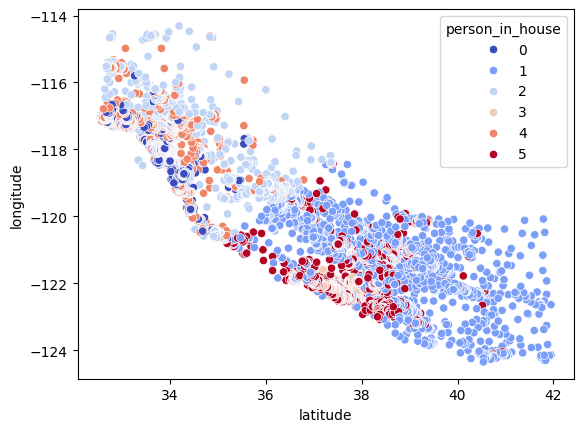

In [56]:
sb.scatterplot(x = "latitude", y = "longitude", data = dt_person_by_house ,hue ="person_in_house" ,palette="coolwarm" )

In [57]:
dt_person_by_house["person_in_house"].value_counts()

person_in_house
4    4773
1    4603
2    4570
5    3434
0    2627
3     633
Name: count, dtype: int64